In [1]:
# Data Collection, Data Cleaning & Data Manipulation
import numpy as np
import pandas as pd
from sklearn import datasets
import os

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Models Building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

## Regression Problems
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Dataset is downloaded from: https://bphc-dashboard.shinyapps.io/BPHC-dashboard/

In [2]:
df = pd.read_csv("Boston_COVID_database_download_2022_06_15-2.csv", low_memory=True)

In [3]:
df.head()

,Window_title,Title,Description1,Category1,Description2,Category2,Value,Value_unit,Value_1,Value_1_unit,Comparison,Timestamp,Chart_info
0,COVID-19 Positive Tests,COVID-19 Positive Tests,Dates,01/22/2020,Measures,Positive Tests,0.0,cases,NaN,cases (7-day moving avg),NaN,06/15/2022,"Boston COVID-19 Dashboard, Boston Public Healt..."
1,COVID-19 Positive Tests,COVID-19 Positive Tests,Dates,01/27/2020,Measures,Positive Tests,0.0,cases,NaN,cases (7-day moving avg),NaN,06/15/2022,"Prepared by the Infectious Disease Bureau, and..."
2,COVID-19 Positive Tests,COVID-19 Positive Tests,Dates,01/29/2020,Measures,Positive Tests,2.5,cases,NaN,cases (7-day moving avg),NaN,06/15/2022,Data release version date: 2022_06_15
3,COVID-19 Positive Tests,COVID-19 Positive Tests,Dates,02/03/2020,Measures,Positive Tests,0.0,cases,NaN,cases (7-day moving avg),NaN,06/15/2022,NaN
4,COVID-19 Positive Tests,COVID-19 Positive Tests,Dates,03/04/2020,Measures,Positive Tests,2.5,cases,NaN,cases (7-day moving avg),NaN,06/15/2022,NaN


In [4]:
df.shape

(17945, 13)

#### Null Values

In [5]:
df.isna().sum()

Window_title        0
Title               0
Description1     1984
Category1           0
Description2      100
Category2         110
Value            1300
Value_unit          0
Value_1          8580
Value_1_unit     8448
Comparison      16043
Timestamp        3406
Chart_info      17942
dtype: int64

### Drop of timestamp of when the data was download, chart description, and comparision columns

In [6]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- Window_title ---
COVID-19 Tests                                                                       5022
COVID-19 Test Positivity                                                             2511
COVID-19 by Neighborhood                                                             2016
COVID-19 Daily Case Count                                                            1688
COVID-19-Like Illness Boston Emergency Department Visits                             1608
COVID-19 Positive Tests                                                               837
COVID-19 Emergency Department Visits                                                  837
Number of Confirmed Adult Hospitalizations due to COVID-19                            837
Number of Adult Hospitalizations due to COVID-19                                      837
Occupied Adult Non-Surge ICU Beds at Boston Hospitals, All Patients                   837
Percentage of Occupied Adult Non-Surge ICU Beds at Boston Hospitals, All Patie

In [7]:
df = df.iloc[: , :-3]

#### Frecuency of the dataset features

In [8]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- Window_title ---
COVID-19 Tests                                                                       5022
COVID-19 Test Positivity                                                             2511
COVID-19 by Neighborhood                                                             2016
COVID-19 Daily Case Count                                                            1688
COVID-19-Like Illness Boston Emergency Department Visits                             1608
COVID-19 Positive Tests                                                               837
COVID-19 Emergency Department Visits                                                  837
Number of Confirmed Adult Hospitalizations due to COVID-19                            837
Number of Adult Hospitalizations due to COVID-19                                      837
Occupied Adult Non-Surge ICU Beds at Boston Hospitals, All Patients                   837
Percentage of Occupied Adult Non-Surge ICU Beds at Boston Hospitals, All Patie

Create a new dataframe for "Covid-19 Tests"

Convert Category1 of Covid-19 Tests to date data type

In [9]:
df7 = df.loc[df['Window_title']=='COVID-19 Tests']
df7['Category1'] = pd.to_datetime(df7['Category1'])

C:\Users\HAITRI~1\AppData\Local\Temp/ipykernel_11576/1279104644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Category1'] = pd.to_datetime(df7['Category1'])


In [10]:
df7.tail()

,Window_title,Title,Description1,Category1,Description2,Category2,Value,Value_unit,Value_1,Value_1_unit
8365,COVID-19 Tests,Current College-Ordered COVID-19 Tests,Dates,2022-06-10,Measures,College-Ordered Tests,275.0,cases,306.3,cases (7-day moving avg)
8366,COVID-19 Tests,Current College-Ordered COVID-19 Tests,Dates,2022-06-11,Measures,College-Ordered Tests,56.0,cases,306.7,cases (7-day moving avg)
8367,COVID-19 Tests,Current College-Ordered COVID-19 Tests,Dates,2022-06-12,Measures,College-Ordered Tests,10.0,cases,304.7,cases (7-day moving avg)
8368,COVID-19 Tests,Current College-Ordered COVID-19 Tests,Dates,2022-06-13,Measures,College-Ordered Tests,NaN,cases,NaN,cases (7-day moving avg)
8369,COVID-19 Tests,Current College-Ordered COVID-19 Tests,Dates,2022-06-14,Measures,College-Ordered Tests,NaN,cases,NaN,cases (7-day moving avg)


Create a new dataframe for "Current All-Boston COVID-19 Tests"

In [11]:
dfBoston = df7.loc[df7['Title']=='Current All-Boston COVID-19 Tests']
dfBoston = dfBoston.rename(columns={"Category1": "Dates", "Value": "Boston-Tests",'Value_1':'Boston-Tests (7-day moving avg)'})

#Drop Columns with 100% Unique Values
for col in dfBoston.columns:
    if len(dfBoston[col].unique()) == 1:
        dfBoston.drop(col,inplace=True,axis=1)

#Checking Null Values
dfBoston.isna().sum()

#Replace Null value with 0
dfBoston.fillna(0,inplace=True)

#Sorting dataset by dates
dfBoston = dfBoston.sort_values(by='Dates')

#reset Index
dfBoston = dfBoston.reset_index(drop=True)

In [12]:
dfBoston.head()

,Dates,Boston-Tests,Boston-Tests (7-day moving avg)
0,2020-01-22,2.5,0
1,2020-01-27,2.5,0
2,2020-01-29,2.5,0
3,2020-02-03,2.5,0
4,2020-03-04,5.0,0


Create a new dataframe for "Current Community COVID-19 Tests"

In [13]:
dfCommunity = df7.loc[df7['Title']=='Current Community COVID-19 Tests']
dfCommunity = dfCommunity.rename(columns={"Category1": "Dates", "Value": "Community-Tests",'Value_1':'Community-Tests (7-day moving avg)'})

#Drop Columns with 100% Unique Values
for col in dfCommunity.columns:
    if len(dfCommunity[col].unique()) == 1:
        dfCommunity.drop(col,inplace=True,axis=1)

#Checking Null Values
dfCommunity.isna().sum()

#Replace Null value with 0
dfCommunity.fillna(0,inplace=True)

#Sorting dataset by dates
dfCommunity = dfCommunity.sort_values(by='Dates')

#reset Index
dfCommunity = dfCommunity.reset_index(drop=True)

In [14]:
dfCommunity.tail(7)

,Dates,Community-Tests,Community-Tests (7-day moving avg)
830,2022-06-08,2880.0,2114.1
831,2022-06-09,2721.0,2069
832,2022-06-10,1666.0,2014.7
833,2022-06-11,801.0,2005.1
834,2022-06-12,850.0,2010.6
835,2022-06-13,0.0,0
836,2022-06-14,0.0,0


Create a new dataframe for "Current College-Ordered COVID-19 Tests"

In [15]:
dfCollege = df7.loc[df7['Title']=='Current College-Ordered COVID-19 Tests']
dfCollege = dfCollege.rename(columns={"Category1": "Dates", "Value": "College-Tests",'Value_1':'Colleges-Tests (7-day moving avg)'})

#Drop Columns with 100% Unique Values
for col in dfCollege.columns:
    if len(dfCollege[col].unique()) == 1:
        dfCollege.drop(col,inplace=True,axis=1)

#Checking Null Values
dfCollege.isna().sum()

#Replace Null value with 0
dfCollege.fillna(0,inplace=True)

#Sorting dataset by dates
dfCollege = dfCollege.sort_values(by='Dates')

#reset Index
dfCollege = dfCollege.reset_index(drop=True)

In [16]:
dfCollege.tail(7)

,Dates,College-Tests,Colleges-Tests (7-day moving avg)
830,2022-06-08,441.0,342.3
831,2022-06-09,429.0,313.4
832,2022-06-10,275.0,306.3
833,2022-06-11,56.0,306.7
834,2022-06-12,10.0,304.7
835,2022-06-13,0.0,0
836,2022-06-14,0.0,0


Merge all three dataframe into one new dataframe

In [17]:
from functools import reduce
data_frames = [dfBoston, dfCommunity, dfCollege]
dftest = reduce(lambda  left,right: pd.merge(left,right,on=['Dates'],
                                            how='outer',sort=True), data_frames)

In [18]:
dftest.tail(7)

,Dates,Boston-Tests,Boston-Tests (7-day moving avg),Community-Tests,Community-Tests (7-day moving avg),College-Tests,Colleges-Tests (7-day moving avg)
830,2022-06-08,3321.0,2456.4,2880.0,2114.1,441.0,342.3
831,2022-06-09,3150.0,2382.4,2721.0,2069,429.0,313.4
832,2022-06-10,1941.0,2321,1666.0,2014.7,275.0,306.3
833,2022-06-11,857.0,2311.9,801.0,2005.1,56.0,306.7
834,2022-06-12,860.0,2315.3,850.0,2010.6,10.0,304.7
835,2022-06-13,0.0,0,0.0,0,0.0,0
836,2022-06-14,0.0,0,0.0,0,0.0,0


### Sub-set of total covid 19 Positive test - timeline

In [19]:
df1 = df.loc[df['Window_title']=='COVID-19 Positive Tests']

#Rename Dataset features
df1 = df1.rename(columns={"Category1": "Dates", "Value": "Positive Tests",'Value_1':'Positive_cases (7-day moving avg)'})

#Convert Column Dates to datetype
df1["Dates"] = pd.to_datetime(df1["Dates"])

#Drop Columns with 100% Unique Values
for col in df1.columns:
    if len(df1[col].unique()) == 1:
        df1.drop(col,inplace=True,axis=1)

#Checking Null Values
df1.isna().sum()

#Replace Null value with 0
df1.fillna(0,inplace=True)

#Sorting dataset by dates
df1 = df1.sort_values(by='Dates')

#reset Index
df1 = df1.reset_index(drop=True)

In [20]:
df1.tail(7)

,Dates,Positive Tests,Positive_cases (7-day moving avg)
830,2022-06-08,244.0,213.7
831,2022-06-09,182.0,199.6
832,2022-06-10,146.0,188.3
833,2022-06-11,77.0,185.4
834,2022-06-12,84.0,182.4
835,2022-06-13,0.0,0
836,2022-06-14,0.0,0


### Sub_set of COVID-19 Emergency Department Visits

In [21]:
df2 = df.loc[df['Window_title']=='COVID-19 Emergency Department Visits']

#Rename Dataset features
df2 = df2.rename(columns={"Category1": "Dates", "Value": "Emergency Department Visits",'Value_1':'EDV_cases (7-day moving avg)'})

#Conver Dates to datetype 
df2["Dates"] = pd.to_datetime(df2["Dates"])

#Drop Columns with 100% Unique Values
for col in df2.columns:
    if len(df2[col].unique()) == 1:
        df2.drop(col,inplace=True,axis=1)

#Checking Null Values
df2.isna().sum()

#Replace Null Values with 0
df2.fillna(0,inplace=True)

#Sorting dataset by dates
df2 = df2.sort_values(by='Dates')

#reset Index
df2 = df2.reset_index(drop=True)

In [22]:
df2.tail(7)

,Dates,Emergency Department Visits,EDV_cases (7-day moving avg)
830,2022-06-08,233.0,235.5714286
831,2022-06-09,235.0,236.4285714
832,2022-06-10,254.0,239
833,2022-06-11,225.0,238.1428571
834,2022-06-12,200.0,235.8571429
835,2022-06-13,184.0,229.4285714
836,2022-06-14,270.0,228.7142857


### Sub_set of 'Number of Adult Hospitalizations due to COVID-19'

In [23]:
df3 = df.loc[df['Window_title']=='Number of Adult Hospitalizations due to COVID-19']

#Rename Dataset features
df3 = df3.rename(columns={"Category1": "Dates", "Value": "Number of Adult Hospitalizations due to COVID-19",'Value_1':'Hospitalization_cases (7-day moving avg)'})

#Conver Dates to datetype 
df3["Dates"] = pd.to_datetime(df3["Dates"])

#Drop Columns with 100% Unique Values
for col in df3.columns:
    if len(df3[col].unique()) == 1:
        df3.drop(col,inplace=True,axis=1)

#Checking Null Values
df3.isna().sum()

#Replace Null Values with 0
df3.fillna(0,inplace=True)

#Sorting dataset by dates
df3 = df3.sort_values(by='Dates')

#reset Index
df3 = df3.reset_index(drop=True)

In [24]:
df3.tail(7)

,Dates,Number of Adult Hospitalizations due to COVID-19
830,2022-06-08,139.142857
831,2022-06-09,136.142857
832,2022-06-10,134.714286
833,2022-06-11,134.142857
834,2022-06-12,135.285714
835,2022-06-13,135.571429
836,2022-06-14,136.142857


### Sub_set of 'Occupied Adult Non-Surge ICU Beds at Boston Hospitals, All Patients'


In [25]:
df4 = df.loc[df['Window_title']=='Occupied Adult Non-Surge ICU Beds at Boston Hospitals, All Patients']

#Rename Dataset features
df4 = df4.rename(columns={"Category1": "Dates", "Value": "Number of Adult Non-Surge ICU Beds",'Value_1':'ICU Beds_cases (7-day moving avg)'})

#Conver Dates to datetype 
df4["Dates"] = pd.to_datetime(df4["Dates"])

#Drop Columns with 100% Unique Values
for col in df4.columns:
    if len(df4[col].unique()) == 1:
        df4.drop(col,inplace=True,axis=1)

#Checking Null Values
df4.isna().sum()

#Replace Null Values with 0
df4.fillna(0,inplace=True)

#Sorting dataset by dates
df4 = df4.sort_values(by='Dates')

#reset Index
df4 = df4.reset_index(drop=True)

In [26]:
df4.tail(7)

,Dates,Number of Adult Non-Surge ICU Beds
830,2022-06-08,95.0
831,2022-06-09,95.0
832,2022-06-10,95.0
833,2022-06-11,95.0
834,2022-06-12,95.0
835,2022-06-13,95.0
836,2022-06-14,95.0


### Sub_set of 'COVID-19-Like Illness Boston Emergency Department Visits'


In [27]:
df5 = df.loc[df['Window_title']=='COVID-19-Like Illness Boston Emergency Department Visits']

In [28]:
df5 = df5.loc[df5['Category2']=="% CLI (All Visits)"]

In [29]:
df5 = df5.rename(columns={"Category1": "Dates", "Value": "% CLI (All Visits)",'Value_1':'% CLI_cases (7-day moving avg)'})

#Conver Dates to datetype 
df5["Dates"] = pd.to_datetime(df5["Dates"])

#Drop Columns with 100% Unique Values
for col in df5.columns:
    if len(df5[col].unique()) == 1:
        df5.drop(col,inplace=True,axis=1)

#Checking Null Values
df5.isna().sum()

#Replace Null Values with 0
df5.fillna(0,inplace=True)

#Sorting dataset by dates
df5 = df5.sort_values(by='Dates')

#reset Index
df5 = df5.reset_index(drop=True)

In [30]:
df5.tail(7)

,Dates,% CLI (All Visits),% CLI_cases (7-day moving avg)
797,2022-04-29,3.3,3.1
798,2022-04-30,3.1,3.1
799,2022-05-01,3.0,3.1
800,2022-05-02,3.4,3.2
801,2022-05-03,2.7,3.1
802,2022-05-04,3.5,3.2
803,2022-05-05,5.2,3.5


### Sub-set Boston Logan Aiport Passenger Arrivals
### https://www.transtats.bts.gov/Data_Elements.aspx?Data=1

In [31]:
header_list =['Year','Month','DOMESTIC','INTERNATIONAL','TOTAL']

df6 = pd.read_csv('Passengers_6_19_2022 9_57_56 AM-2.csv',header=1,sep=',', thousands=',')

In [32]:
df6.shape

(259, 5)

In [33]:
df6.head()

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,861825.0,155046.0,1016871.0
1,2002,11,723987.0,120735.0,844722.0
2,2002,12,773015.0,121996.0,895011.0
3,2002,TOTAL,9051373.0,1665945.0,10717318.0
4,2003,1,619641.0,102780.0,722421.0


In [34]:
df6.drop(df6[df6['Month'] == 'TOTAL'].index, inplace = True)
df6.drop(df6[df6['Year'] == 'Note: All numbers are for scheduled services.'].index, inplace = True)
df6.drop(df6[df6['Year'] == 'SOURCE: Bureau of Transportation Statistics T-100 Market data.'].index, inplace = True)

df6 = df6.loc[df6["Year"]>='2020']

df6.INTERNATIONAL.fillna(value=df6.INTERNATIONAL.mean(), inplace = True)

df6.drop('TOTAL',axis=1,inplace=True)

df6['Dates'] = df6[['Year', 'Month']].agg('-'.join, axis=1)
df6["Dates"] = pd.to_datetime(df6["Dates"])
df6.drop(['Year','Month'],axis=1,inplace=True)

df6=df6.reset_index(drop=True)

df6.tail()

,DOMESTIC,INTERNATIONAL,Dates
22,1083387.0,114162.0,2021-11-01
23,1050854.0,153182.0,2021-12-01
24,691172.0,75327.0,2022-01-01
25,838796.0,75327.0,2022-02-01
26,1163126.0,75327.0,2022-03-01


In [35]:
df6.shape

(27, 3)

#### Merge all subset

In [36]:
from functools import reduce
data_frames = [df1, df2, df3, df4, df5, df6, dftest]
dfmerged = reduce(lambda  left,right: pd.merge(left,right,on=['Dates'],
                                            how='outer',sort=True), data_frames)

In [37]:
dfmerged.tail(7)

,Dates,Positive Tests,Positive_cases (7-day moving avg),Emergency Department Visits,EDV_cases (7-day moving avg),Number of Adult Hospitalizations due to COVID-19,Number of Adult Non-Surge ICU Beds,% CLI (All Visits),% CLI_cases (7-day moving avg),DOMESTIC,INTERNATIONAL,Boston-Tests,Boston-Tests (7-day moving avg),Community-Tests,Community-Tests (7-day moving avg),College-Tests,Colleges-Tests (7-day moving avg)
843,2022-06-08,244.0,213.7,233.0,235.5714286,139.142857,95.0,NaN,NaN,NaN,NaN,3321.0,2456.4,2880.0,2114.1,441.0,342.3
844,2022-06-09,182.0,199.6,235.0,236.4285714,136.142857,95.0,NaN,NaN,NaN,NaN,3150.0,2382.4,2721.0,2069,429.0,313.4
845,2022-06-10,146.0,188.3,254.0,239,134.714286,95.0,NaN,NaN,NaN,NaN,1941.0,2321,1666.0,2014.7,275.0,306.3
846,2022-06-11,77.0,185.4,225.0,238.1428571,134.142857,95.0,NaN,NaN,NaN,NaN,857.0,2311.9,801.0,2005.1,56.0,306.7
847,2022-06-12,84.0,182.4,200.0,235.8571429,135.285714,95.0,NaN,NaN,NaN,NaN,860.0,2315.3,850.0,2010.6,10.0,304.7
848,2022-06-13,0.0,0,184.0,229.4285714,135.571429,95.0,NaN,NaN,NaN,NaN,0.0,0,0.0,0,0.0,0
849,2022-06-14,0.0,0,270.0,228.7142857,136.142857,95.0,NaN,NaN,NaN,NaN,0.0,0,0.0,0,0.0,0


#### Filling Null values with near value since key column to join "Dates" do not much with subset % CLI visits

In [38]:
dfmerged.fillna(method='ffill',inplace=True)
dfmerged.fillna(0,inplace=True)

### Creating New Features, Splitting Date into Year, Mot\nth, and Day of the week

In [39]:
#from pandas.api.types import CategoricalDtype

#cats = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#cat_type = CategoricalDtype(categories=cats, ordered=True)
#dfmerged['Month']=dfmerged.Dates.dt.strftime('%b').astype(cat_type)

In [40]:
#dfmerged['Day'] = dfmerged['Dates'].dt.day_name()
dfmerged['Year'] = dfmerged['Dates'].dt.year.astype(str)

In [41]:
#dfmerged['Day'] = dfmerged['Dates'].dt.day_name()
#dfmerged['Year'] = dfmerged['Dates'].dt.year

In [42]:
dfmerged.tail()

,Dates,Positive Tests,Positive_cases (7-day moving avg),Emergency Department Visits,EDV_cases (7-day moving avg),Number of Adult Hospitalizations due to COVID-19,Number of Adult Non-Surge ICU Beds,% CLI (All Visits),% CLI_cases (7-day moving avg),DOMESTIC,INTERNATIONAL,Boston-Tests,Boston-Tests (7-day moving avg),Community-Tests,Community-Tests (7-day moving avg),College-Tests,Colleges-Tests (7-day moving avg),Year
845,2022-06-10,146.0,188.3,254.0,239,134.714286,95.0,5.2,3.5,1163126.0,75327.0,1941.0,2321,1666.0,2014.7,275.0,306.3,2022
846,2022-06-11,77.0,185.4,225.0,238.1428571,134.142857,95.0,5.2,3.5,1163126.0,75327.0,857.0,2311.9,801.0,2005.1,56.0,306.7,2022
847,2022-06-12,84.0,182.4,200.0,235.8571429,135.285714,95.0,5.2,3.5,1163126.0,75327.0,860.0,2315.3,850.0,2010.6,10.0,304.7,2022
848,2022-06-13,0.0,0,184.0,229.4285714,135.571429,95.0,5.2,3.5,1163126.0,75327.0,0.0,0,0.0,0,0.0,0,2022
849,2022-06-14,0.0,0,270.0,228.7142857,136.142857,95.0,5.2,3.5,1163126.0,75327.0,0.0,0,0.0,0,0.0,0,2022


#### Based on The Commonwealth of Massachusetts Executive Office of Health and Human Services Department of Public Health 

In [43]:
dfmerged.loc[(dfmerged['Dates'] < '2020-5-6') , 'Mask'] = 'No mask'
dfmerged.loc[(dfmerged['Dates'] >= '2020-5-6') , 'Mask'] = 'Mask Mandated' 
dfmerged.loc[(dfmerged['Dates'] >= '2022-2-28'),'Mask'] = "Optional"

In [44]:
dfmerged.tail(7)

,Dates,Positive Tests,Positive_cases (7-day moving avg),Emergency Department Visits,EDV_cases (7-day moving avg),Number of Adult Hospitalizations due to COVID-19,Number of Adult Non-Surge ICU Beds,% CLI (All Visits),% CLI_cases (7-day moving avg),DOMESTIC,INTERNATIONAL,Boston-Tests,Boston-Tests (7-day moving avg),Community-Tests,Community-Tests (7-day moving avg),College-Tests,Colleges-Tests (7-day moving avg),Year,Mask
843,2022-06-08,244.0,213.7,233.0,235.5714286,139.142857,95.0,5.2,3.5,1163126.0,75327.0,3321.0,2456.4,2880.0,2114.1,441.0,342.3,2022,Optional
844,2022-06-09,182.0,199.6,235.0,236.4285714,136.142857,95.0,5.2,3.5,1163126.0,75327.0,3150.0,2382.4,2721.0,2069,429.0,313.4,2022,Optional
845,2022-06-10,146.0,188.3,254.0,239,134.714286,95.0,5.2,3.5,1163126.0,75327.0,1941.0,2321,1666.0,2014.7,275.0,306.3,2022,Optional
846,2022-06-11,77.0,185.4,225.0,238.1428571,134.142857,95.0,5.2,3.5,1163126.0,75327.0,857.0,2311.9,801.0,2005.1,56.0,306.7,2022,Optional
847,2022-06-12,84.0,182.4,200.0,235.8571429,135.285714,95.0,5.2,3.5,1163126.0,75327.0,860.0,2315.3,850.0,2010.6,10.0,304.7,2022,Optional
848,2022-06-13,0.0,0,184.0,229.4285714,135.571429,95.0,5.2,3.5,1163126.0,75327.0,0.0,0,0.0,0,0.0,0,2022,Optional
849,2022-06-14,0.0,0,270.0,228.7142857,136.142857,95.0,5.2,3.5,1163126.0,75327.0,0.0,0,0.0,0,0.0,0,2022,Optional


In [45]:
dfmerged = dfmerged[dfmerged['Positive Tests'] != 0]

In [46]:
dfmerged.shape

(832, 19)

In [47]:
dfmerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 3 to 847
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Dates                                             832 non-null    datetime64[ns]
 1   Positive Tests                                    832 non-null    float64       
 2   Positive_cases (7-day moving avg)                 832 non-null    object        
 3   Emergency Department Visits                       832 non-null    float64       
 4   EDV_cases (7-day moving avg)                      832 non-null    object        
 5   Number of Adult Hospitalizations due to COVID-19  832 non-null    float64       
 6   Number of Adult Non-Surge ICU Beds                832 non-null    float64       
 7   % CLI (All Visits)                                832 non-null    float64       
 8   % CLI_cases (7-day moving avg)

In [48]:
dfmerged.describe()

,Positive Tests,Emergency Department Visits,Number of Adult Hospitalizations due to COVID-19,Number of Adult Non-Surge ICU Beds,% CLI (All Visits),DOMESTIC,INTERNATIONAL,Boston-Tests,Community-Tests,College-Tests
count,832.000000,832.000000,832.000000,832.000000,832.000000,8.320000e+02,832.000000,832.000000,832.000000,832.000000
mean,231.889423,168.825721,70.909169,89.519231,4.314423,6.690273e+05,63977.106971,6737.581731,2885.681490,3851.923678
std,406.713454,103.960025,136.081164,22.163589,3.010261,3.795763e+05,42734.089698,5189.133055,1989.555101,3762.673499
min,2.500000,0.000000,0.000000,0.000000,0.000000,3.545100e+04,1528.000000,2.500000,2.500000,0.000000
25%,52.000000,142.000000,0.000000,95.000000,2.300000,3.205540e+05,27020.000000,1981.750000,1374.000000,326.500000
50%,125.500000,177.500000,0.000000,95.000000,3.300000,6.502930e+05,54365.000000,5299.000000,2524.500000,2773.000000
75%,261.750000,218.250000,104.142857,95.000000,5.200000,1.083387e+06,94574.000000,10774.000000,4024.250000,6394.250000
max,4328.000000,670.000000,769.428571,95.000000,21.500000,1.201795e+06,249610.000000,26628.000000,11288.000000,20309.000000


In [49]:
dfmerged.groupby("Mask").mean()

,Positive Tests,Emergency Department Visits,Number of Adult Hospitalizations due to COVID-19,Number of Adult Non-Surge ICU Beds,% CLI (All Visits),DOMESTIC,INTERNATIONAL,Boston-Tests,Community-Tests,College-Tests
Mask,,,,,,,,,,
Mask Mandated,234.961538,177.260935,71.045464,95.00,4.18914,6.241415e+05,63106.886878,7586.266968,3204.478130,4381.798643
No mask,170.679688,0.000000,0.000000,23.75,7.23750,3.284531e+05,54371.125000,631.328125,628.312500,3.218750
Optional,249.800000,218.466667,113.269388,95.00,3.32381,1.160037e+06,75327.000000,5100.647619,2248.628571,2852.019048


In [50]:
dfmerged.groupby("Year").mean()

,Positive Tests,Emergency Department Visits,Number of Adult Hospitalizations due to COVID-19,Number of Adult Non-Surge ICU Beds,% CLI (All Visits),DOMESTIC,INTERNATIONAL,Boston-Tests,Community-Tests,College-Tests
Year,,,,,,,,,,
2020,137.180921,87.753289,0.000000,80.0,4.704276,2.941752e+05,30965.161184,4452.513158,2320.990132,2131.587171
2021,203.698630,200.178082,55.722896,95.0,4.069589,8.255445e+05,86403.405479,8669.326027,3452.778082,5216.547945
2022,471.650307,249.822086,237.163015,95.0,4.135583,1.017655e+06,75327.000000,6673.619632,2668.969325,4004.650307


In [51]:
import seaborn as sn
import matplotlib.pyplot as plt

C:\Users\HAITRIEU-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


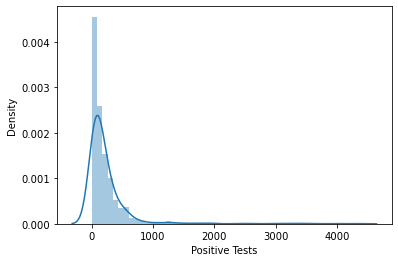

In [52]:
data = dfmerged['Positive Tests']
res = sn.distplot(data)
plt.show()

<AxesSubplot:xlabel='Dates'>

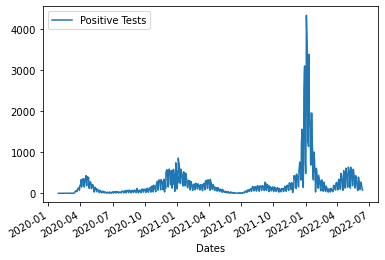

In [53]:
ax = plt.gca()
  
#use plot() method on the dataframe
dfmerged.plot( x = 'Dates' , y = 'Positive Tests', ax = ax )

<AxesSubplot:xlabel='Dates'>

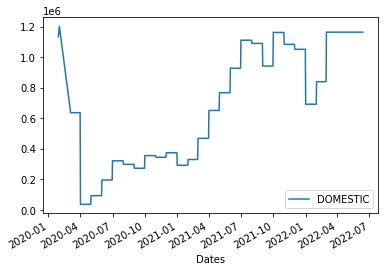

In [54]:
ax = plt.gca()
dfmerged.plot( x = 'Dates' , y = 'DOMESTIC' , ax = ax )

### Categorical Features to Dummies

In [55]:
cat_vars = ['Mask','Year']#,'Month']#,'Day']

In [56]:
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dfmerged[var], prefix=var,dtype=float,drop_first=False)
    data1=dfmerged.join(cat_list, how='left', lsuffix='_left', rsuffix='_right')
    dfmerged=data1
data_vars=dfmerged.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [57]:
df_final=dfmerged[to_keep]
df_final.columns.values

array(['Dates', 'Positive Tests', 'Positive_cases (7-day moving avg)',
       'Emergency Department Visits', 'EDV_cases (7-day moving avg)',
       'Number of Adult Hospitalizations due to COVID-19',
       'Number of Adult Non-Surge ICU Beds', '% CLI (All Visits)',
       '% CLI_cases (7-day moving avg)', 'DOMESTIC', 'INTERNATIONAL',
       'Boston-Tests', 'Boston-Tests (7-day moving avg)',
       'Community-Tests', 'Community-Tests (7-day moving avg)',
       'College-Tests', 'Colleges-Tests (7-day moving avg)',
       'Mask_Mask Mandated', 'Mask_No mask', 'Mask_Optional', 'Year_2020',
       'Year_2021', 'Year_2022'], dtype=object)

In [58]:
df_final.tail()

,Dates,Positive Tests,Positive_cases (7-day moving avg),Emergency Department Visits,EDV_cases (7-day moving avg),Number of Adult Hospitalizations due to COVID-19,Number of Adult Non-Surge ICU Beds,% CLI (All Visits),% CLI_cases (7-day moving avg),DOMESTIC,...,Community-Tests,Community-Tests (7-day moving avg),College-Tests,Colleges-Tests (7-day moving avg),Mask_Mask Mandated,Mask_No mask,Mask_Optional,Year_2020,Year_2021,Year_2022
843,2022-06-08,244.0,213.7,233.0,235.5714286,139.142857,95.0,5.2,3.5,1163126.0,...,2880.0,2114.1,441.0,342.3,0.0,0.0,1.0,0.0,0.0,1.0
844,2022-06-09,182.0,199.6,235.0,236.4285714,136.142857,95.0,5.2,3.5,1163126.0,...,2721.0,2069,429.0,313.4,0.0,0.0,1.0,0.0,0.0,1.0
845,2022-06-10,146.0,188.3,254.0,239,134.714286,95.0,5.2,3.5,1163126.0,...,1666.0,2014.7,275.0,306.3,0.0,0.0,1.0,0.0,0.0,1.0
846,2022-06-11,77.0,185.4,225.0,238.1428571,134.142857,95.0,5.2,3.5,1163126.0,...,801.0,2005.1,56.0,306.7,0.0,0.0,1.0,0.0,0.0,1.0
847,2022-06-12,84.0,182.4,200.0,235.8571429,135.285714,95.0,5.2,3.5,1163126.0,...,850.0,2010.6,10.0,304.7,0.0,0.0,1.0,0.0,0.0,1.0


### Drop Categorical Variables

In [59]:
df=my_df= df_final.select_dtypes(exclude=['object'])

In [60]:
my_df.tail()

,Dates,Positive Tests,Emergency Department Visits,Number of Adult Hospitalizations due to COVID-19,Number of Adult Non-Surge ICU Beds,% CLI (All Visits),DOMESTIC,INTERNATIONAL,Boston-Tests,Community-Tests,College-Tests,Mask_Mask Mandated,Mask_No mask,Mask_Optional,Year_2020,Year_2021,Year_2022
843,2022-06-08,244.0,233.0,139.142857,95.0,5.2,1163126.0,75327.0,3321.0,2880.0,441.0,0.0,0.0,1.0,0.0,0.0,1.0
844,2022-06-09,182.0,235.0,136.142857,95.0,5.2,1163126.0,75327.0,3150.0,2721.0,429.0,0.0,0.0,1.0,0.0,0.0,1.0
845,2022-06-10,146.0,254.0,134.714286,95.0,5.2,1163126.0,75327.0,1941.0,1666.0,275.0,0.0,0.0,1.0,0.0,0.0,1.0
846,2022-06-11,77.0,225.0,134.142857,95.0,5.2,1163126.0,75327.0,857.0,801.0,56.0,0.0,0.0,1.0,0.0,0.0,1.0
847,2022-06-12,84.0,200.0,135.285714,95.0,5.2,1163126.0,75327.0,860.0,850.0,10.0,0.0,0.0,1.0,0.0,0.0,1.0


In [61]:
df = df[['Dates','Positive Tests','Emergency Department Visits','Number of Adult Hospitalizations due to COVID-19','DOMESTIC','INTERNATIONAL','Boston-Tests','Community-Tests','College-Tests']]

In [62]:
df.tail()

,Dates,Positive Tests,Emergency Department Visits,Number of Adult Hospitalizations due to COVID-19,DOMESTIC,INTERNATIONAL,Boston-Tests,Community-Tests,College-Tests
843,2022-06-08,244.0,233.0,139.142857,1163126.0,75327.0,3321.0,2880.0,441.0
844,2022-06-09,182.0,235.0,136.142857,1163126.0,75327.0,3150.0,2721.0,429.0
845,2022-06-10,146.0,254.0,134.714286,1163126.0,75327.0,1941.0,1666.0,275.0
846,2022-06-11,77.0,225.0,134.142857,1163126.0,75327.0,857.0,801.0,56.0
847,2022-06-12,84.0,200.0,135.285714,1163126.0,75327.0,860.0,850.0,10.0


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

C:\Users\HAITRIEU-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\HAITRIEU-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [64]:
df.index = df.Dates
df = df.drop(['Dates'], axis=1)

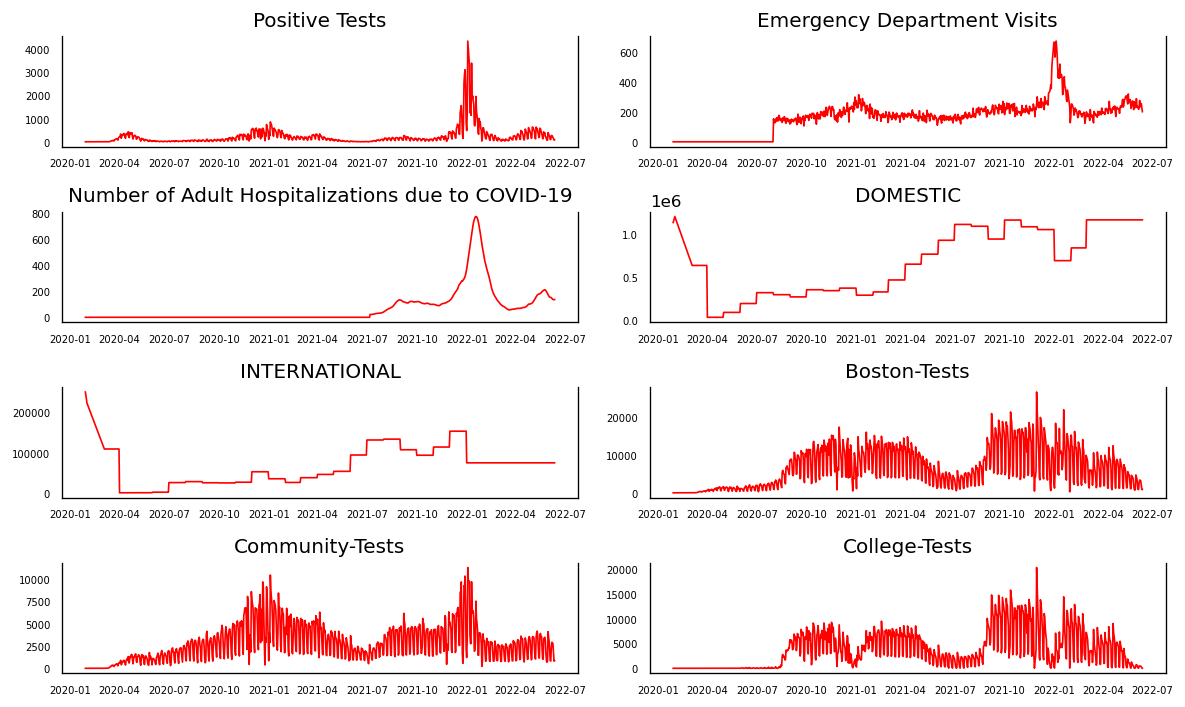

In [65]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [66]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,Positive Tests_x,Emergency Department Visits_x,Number of Adult Hospitalizations due to COVID-19_x,DOMESTIC_x,INTERNATIONAL_x,Boston-Tests_x,Community-Tests_x,College-Tests_x
Positive Tests_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Emergency Department Visits_y,0.0000,1.0000,0.0002,0.0057,0.0001,0.0000,0.0000,0.0000
Number of Adult Hospitalizations due to COVID-19_y,0.0000,0.0000,1.0000,0.0006,0.0000,0.2951,0.0000,0.0008
DOMESTIC_y,0.0004,0.0012,0.1544,1.0000,0.0000,0.0320,0.1056,0.0259
INTERNATIONAL_y,0.0000,0.0217,0.0439,0.0000,1.0000,0.0031,0.0202,0.0045
Boston-Tests_y,0.0000,0.0000,0.0029,0.0399,0.0440,1.0000,0.0000,0.0000
Community-Tests_y,0.0000,0.0000,0.0000,0.4521,0.2317,0.0000,1.0000,0.0000
College-Tests_y,0.0000,0.0000,0.0043,0.0174,0.0590,0.0000,0.0000,1.0000


In [67]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Positive Tests ::  365.37    > 143.6691  =>   True
Emergency Department Visits ::  221.53    > 111.7797  =>   True
Number of Adult Hospitalizations due to COVID-19 ::  117.6     > 83.9383   =>   True
DOMESTIC ::  64.23     > 60.0627   =>   True
INTERNATIONAL ::  35.47     > 40.1749   =>   False
Boston-Tests ::  14.96     > 24.2761   =>   False
Community-Tests ::  4.15      > 12.3212   =>   False
College-Tests ::  0.38      > 4.1296    =>   False


In [68]:
nobs = 15
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(817, 8)
(15, 8)


In [69]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [70]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Positive Tests" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.0663
 No. Lags Chosen       = 21
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.0011. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Emergency Department Visits" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4611
 No. Lags Chosen       = 21
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.1252. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Number of Adult Hospitalizations due to COVID-19" 
    -------------------------

In [71]:
df_differenced = df_train.diff().dropna()

In [72]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Positive Tests" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.1554
 No. Lags Chosen       = 21
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Emergency Department Visits" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.4344
 No. Lags Chosen       = 20
 Critical value 1%     = -3.439
 Critical value 5%     = -2.865
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Number of Adult Hospitalizations due to COVID-19" 
    -----------------------------------------------
 Null

# All the series are now stationary.

## How to Select the Order (P) of VAR model

In [73]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  82.67694492486824
BIC :  83.09244129806251
FPE :  8.056456766548064e+35
HQIC:  82.83641975695015 

Lag Order = 2
AIC :  81.95427037146969
BIC :  82.73985588716545
FPE :  3.911186227771175e+35
HQIC:  82.25580946305094 

Lag Order = 3
AIC :  81.56548050015259
BIC :  82.72187191701552
FPE :  2.651584564870057e+35
HQIC:  82.00937552660854 

Lag Order = 4
AIC :  81.1623559338787
BIC :  82.69027230063077
FPE :  1.7722253655538085e+35
HQIC:  81.74889952537 

Lag Order = 5
AIC :  80.25234265912277
BIC :  82.15250532465897
FPE :  7.135909155136878e+34
HQIC:  80.98182840486623 

Lag Order = 6
AIC :  79.41441265528817
BIC :  81.68754527885022
FPE :  3.0885532330709523e+34
HQIC:  80.28713510785184 

Lag Order = 7
AIC :  79.11965209190932
BIC :  81.76648065331682
FPE :  2.3016584558905455e+34
HQIC:  80.13590677153192 

Lag Order = 8
AIC :  79.07240694108779
BIC :  82.0936597510271
FPE :  2.1974578189890842e+34
HQIC:  80.23249034002275 

Lag Order = 9
AIC :  79.06255849492972
BI

C:\Users\HAITRIEU-PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [74]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,85.59,85.64,1.482e+37,85.61
1,82.34,82.76,5.761e+35,82.50
2,81.98,82.77,4.011e+35,82.28
3,81.59,82.75,2.709e+35,82.04
4,81.18,82.72,1.804e+35,81.77
5,80.25,82.16,7.097e+34,80.98
6,79.38,81.66*,2.979e+34,80.26
7,79.08,81.74,2.202e+34,80.10*
8,79.06,82.10,2.175e+34,80.23
9,79.06,82.47,2.171e+34,80.37


## Train the VAR Model of Selected Order(p)

In [75]:
model_fitted = model.fit(11)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Jun, 2022
Time:                     17:06:00
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    83.1349
Nobs:                     805.000    HQIC:                   80.5793
Log likelihood:          -40217.8    FPE:                2.02447e+34
AIC:                      78.9859    Det(Omega_mle):     8.74942e+33
--------------------------------------------------------------------
Results for equation Positive Tests
                                                          coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------------------
const                                                        0.328310         4.626757            0.071           0.943
L1.Positive Tes

## Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [76]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, end = ' : ')
    print( round(val, 2))

Positive Tests : 2.04
Emergency Department Visits : 2.03
Number of Adult Hospitalizations due to COVID-19 : 2.02
DOMESTIC : 2.0
INTERNATIONAL : 2.01
Boston-Tests : 2.03
Community-Tests : 2.02
College-Tests : 2.02


In [77]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 11

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

11


array([[-9.1000000e+01, -5.9000000e+01,  4.4285715e+00,  0.0000000e+00,
         0.0000000e+00, -6.1400000e+02, -4.1800000e+02, -1.9600000e+02],
       [-9.6000000e+01,  7.0000000e+00,  4.4285714e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  6.7000000e+01, -6.7000000e+01],
       [-7.7000000e+01,  1.5000000e+01,  5.7142857e+00,  0.0000000e+00,
         0.0000000e+00, -1.7110000e+03, -1.4290000e+03, -2.8200000e+02],
       [-1.5700000e+02, -6.0000000e+00,  3.8571429e+00,  0.0000000e+00,
         0.0000000e+00, -1.7840000e+03, -1.0910000e+03, -6.9300000e+02],
       [-1.0000000e+00, -5.4000000e+01,  2.7142857e+00,  0.0000000e+00,
         0.0000000e+00, -6.8000000e+01, -1.5000000e+01, -5.3000000e+01],
       [ 2.9600000e+02,  1.7000000e+01,  2.7142857e+00,  0.0000000e+00,
         0.0000000e+00,  3.5600000e+03,  2.3220000e+03,  1.2380000e+03],
       [-8.7000000e+01,  1.8000000e+01,  3.2857143e+00,  0.0000000e+00,
         0.0000000e+00, -5.6500000e+02,  5.2000000e+01, -6

In [78]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,Positive Tests_1d,Emergency Department Visits_1d,Number of Adult Hospitalizations due to COVID-19_1d,DOMESTIC_1d,INTERNATIONAL_1d,Boston-Tests_1d,Community-Tests_1d,College-Tests_1d
Dates,,,,,,,,
2022-05-29,27.571138,-23.619622,-6.341434,11402.912179,1409.698315,544.546036,302.606633,241.941370
2022-05-30,193.832442,10.052851,-6.963924,-10455.677326,-1088.809820,2886.226610,1799.196297,1087.013621
2022-05-31,7.227879,15.606323,-7.141512,-4329.553063,-104.920996,536.923906,329.868769,207.023179
2022-06-01,-27.169326,8.827008,-7.075003,3572.373984,764.831663,-1071.275959,-208.685589,-862.547250
2022-06-02,1.634448,-2.263297,-6.596190,-2164.239689,-918.616148,-637.559258,-196.907602,-440.668937
2022-06-03,-51.410727,-6.426558,-5.767131,-419.167999,-80.242453,-1492.486687,-1057.401808,-435.090779
2022-06-04,31.190734,6.297321,-5.363336,-12343.083776,-3680.243798,-310.757129,-410.624091,99.897040
2022-06-05,-43.579220,-5.875956,-4.830163,-6153.390211,-2310.343115,-277.480373,-69.428523,-208.060263
2022-06-06,211.838834,-0.865235,-4.394612,3607.082217,437.592635,3066.336688,1548.164952,1518.151868


In [79]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [80]:
df_results = invert_transformation(df_train, df_forecast)
N = int(len(df_results.columns)/2)
# Select last N columns of dataframe
df_results  = df_results.iloc[: , -N:]

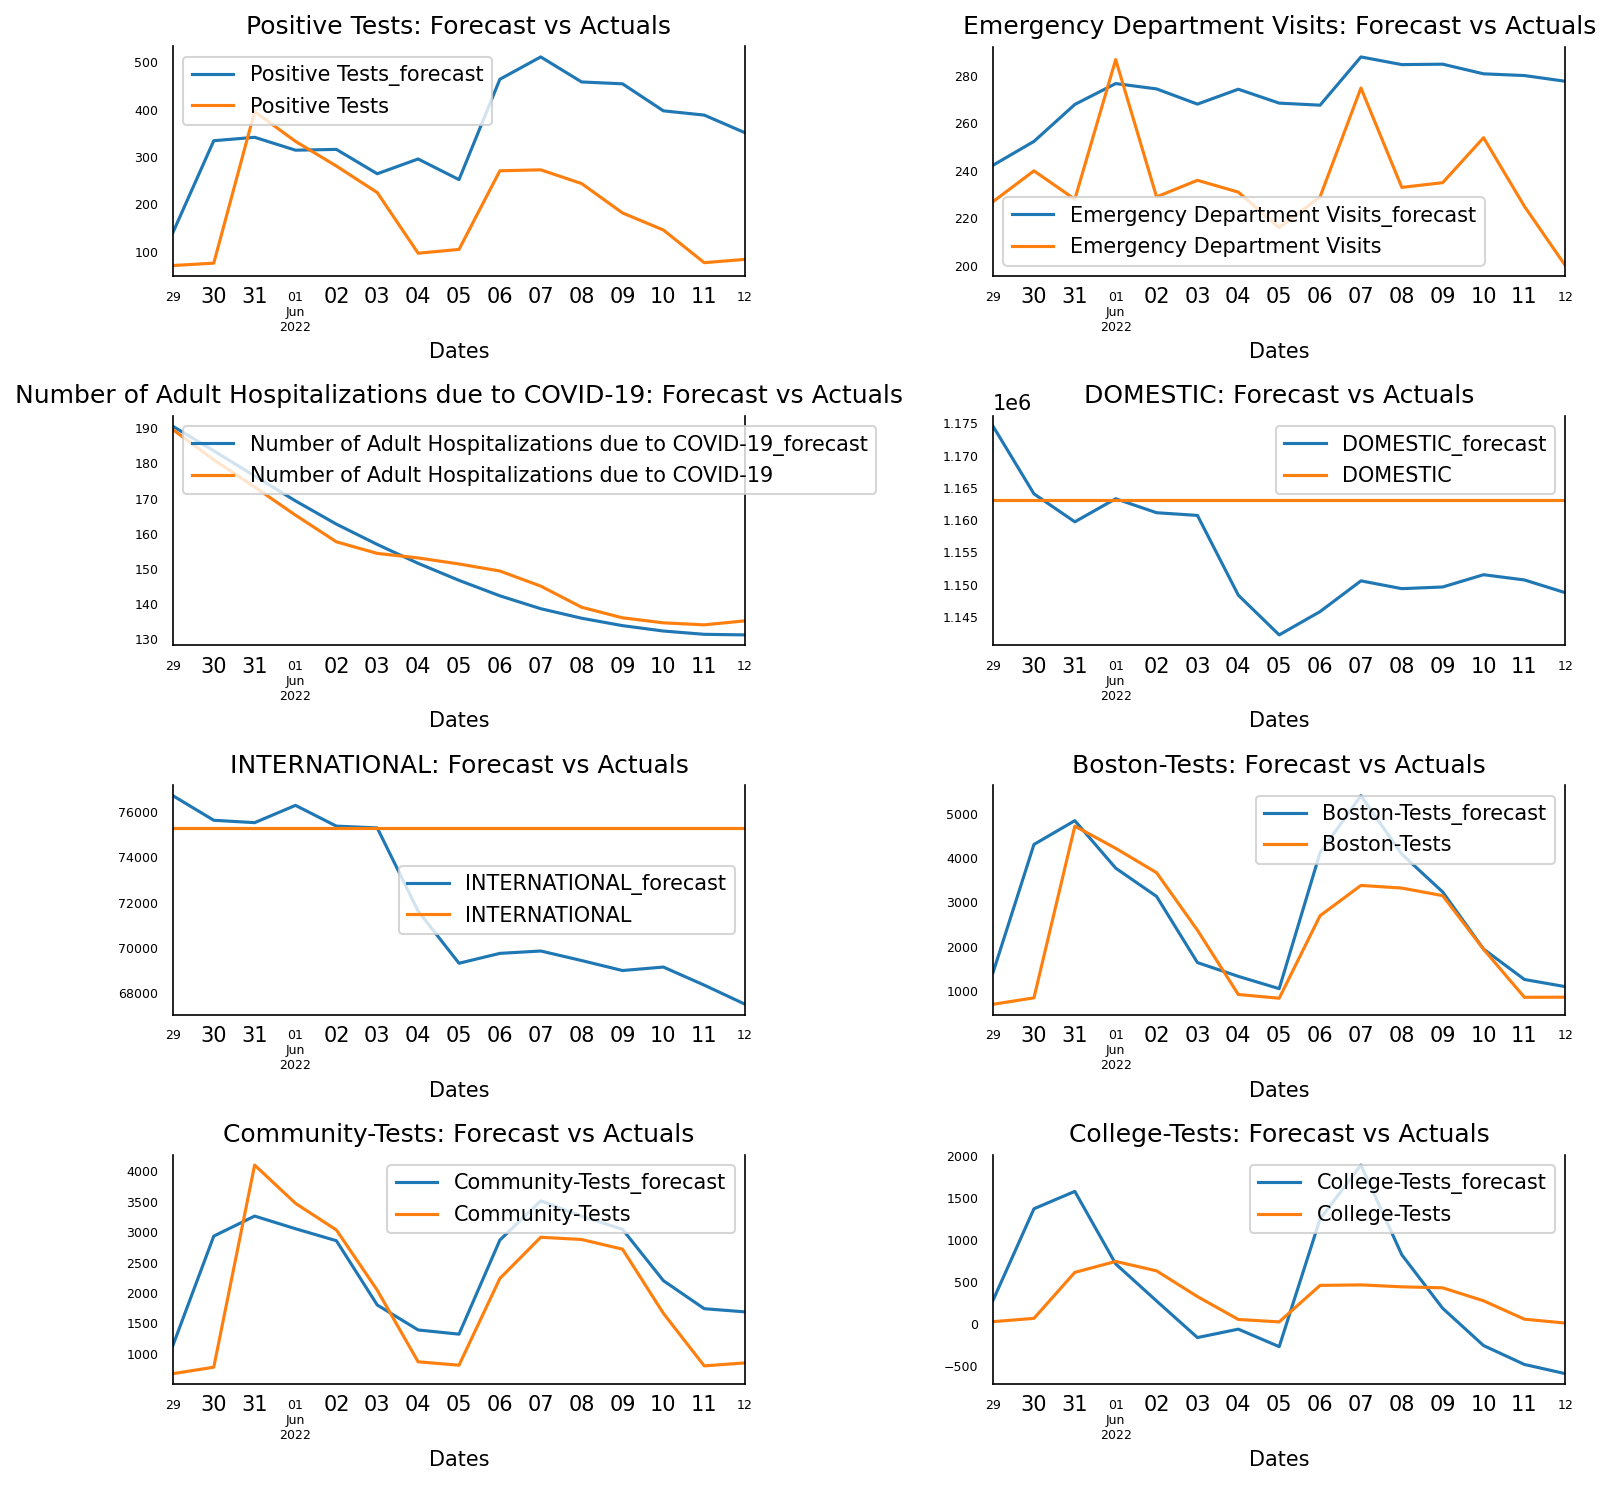

In [81]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

## Evaluate the Forecasts

In [82]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Positive Tests')
accuracy_prod = forecast_accuracy(df_results['Positive Tests_forecast'].values, df_test['Positive Tests'])
for k, v in accuracy_prod.items():
    print(k, end = ' : ')
    print(round(v,4))

print('\nForecast Accuracy of: Emergency Department Visits')
accuracy_prod = forecast_accuracy(df_results['Emergency Department Visits_forecast'].values, df_test['Emergency Department Visits'])
for k, v in accuracy_prod.items():
    print(k, end = ' : ')
    print(round(v,4))

print('\nForecast Accuracy of: Number of Adult Hospitalizations due to COVID-19')
accuracy_prod = forecast_accuracy(df_results['Number of Adult Hospitalizations due to COVID-19_forecast'].values, df_test['Number of Adult Hospitalizations due to COVID-19'])
for k, v in accuracy_prod.items():
    print(k, end = ' : ')
    print( round(v,4))

print('\nForecast Accuracy of: DOMESTICFlysArrive')
accuracy_prod = forecast_accuracy(df_results['DOMESTIC_forecast'].values, df_test['DOMESTIC'])
for k, v in accuracy_prod.items():
    print(k, end = ' : ')
    print(round(v,4))

print('\nForecast Accuracy of: INTERNATIONAL')
accuracy_prod = forecast_accuracy(df_results['INTERNATIONAL_forecast'].values, df_test['INTERNATIONAL'])
for k, v in accuracy_prod.items():
    print(k, end = ' : ')
    print( round(v,4))

print('\nForecast Accuracy of: Boston-Tests')
accuracy_prod = forecast_accuracy(df_results['Boston-Tests_forecast'].values, df_test['Boston-Tests'])
for k, v in accuracy_prod.items():
    print(k, end = ' : ')
    print( round(v,4))

print('\nForecast Accuracy of: Community-Tests')
accuracy_prod = forecast_accuracy(df_results['Community-Tests_forecast'].values, df_test['Community-Tests'])
for k, v in accuracy_prod.items():
    print(k, end = ' : ')
    print( round(v,4))

print('\nForecast Accuracy of: College-Tests')
accuracy_prod = forecast_accuracy(df_results['College-Tests_forecast'].values, df_test['College-Tests'])
for k, v in accuracy_prod.items():
    print(k, end = ' : ')
    print( round(v,4))

Forecast Accuracy of: Positive Tests
mape : 1.4158
me : 161.638
mae : 171.3588
mpe : 1.3901
rmse : 197.4777
corr : 0.3345
minmax : 0.4748

Forecast Accuracy of: Emergency Department Visits


C:\Users\HAITRI~1\AppData\Local\Temp/ipykernel_11576/1430100453.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\HAITRI~1\AppData\Local\Temp/ipykernel_11576/1430100453.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


mape : 0.1661
me : 36.3591
mae : 37.7103
mpe : 0.1614
rmse : 42.0895
corr : 0.2597
minmax : 0.1373

Forecast Accuracy of: Number of Adult Hospitalizations due to COVID-19
mape : 0.0232
me : -1.0507
mae : 3.4825
mpe : -0.0085
rmse : 3.8588
corr : 0.9885
minmax : 0.023

Forecast Accuracy of: DOMESTICFlysArrive
mape : 0.0087
me : -8410.4964
mae : 10082.5235
mpe : -0.0072
rmse : 11901.0143
corr : nan
minmax : 0.0087

Forecast Accuracy of: INTERNATIONAL
mape : 0.0504
me : -3398.1045
mae : 3796.7093
mpe : -0.0451
rmse : 4737.2582
corr : nan
minmax : 0.0504

Forecast Accuracy of: Boston-Tests


C:\Users\HAITRIEU-PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\HAITRIEU-PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


mape : 0.5694
me : 543.4582
mae : 771.904
mpe : 0.4947
rmse : 1173.6888
corr : 0.7309
minmax : 0.2586

Forecast Accuracy of: Community-Tests
mape : 0.5612
me : 415.7595
mae : 639.4378
mpe : 0.4942
rmse : 785.7845
corr : 0.808
minmax : 0.2869

Forecast Accuracy of: College-Tests
mape : 8.3496
me : 127.6778
mae : 554.5044
mpe : -3.4944
rmse : 680.7293
corr : 0.5264
minmax : 6.2098


# SARIMA MODEL

In [83]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'g'


In [84]:
df.head()

,Positive Tests,Emergency Department Visits,Number of Adult Hospitalizations due to COVID-19,DOMESTIC,INTERNATIONAL,Boston-Tests,Community-Tests,College-Tests
Dates,,,,,,,,
2020-01-29,2.5,0.0,0.0,1132859.0,249610.0,2.5,2.5,0.0
2020-02-01,2.5,0.0,0.0,1201795.0,222145.0,2.5,2.5,0.0
2020-03-04,2.5,0.0,0.0,635633.0,109381.0,5.0,5.0,0.0
2020-03-05,2.5,0.0,0.0,635633.0,109381.0,5.0,5.0,0.0
2020-03-06,5.0,0.0,0.0,635633.0,109381.0,7.0,7.0,0.0


In [85]:
y = df['Positive Tests']

In [86]:
y.tail()

Dates
2022-06-08    244.0
2022-06-09    182.0
2022-06-10    146.0
2022-06-11     77.0
2022-06-12     84.0
Name: Positive Tests, dtype: float64

### Analyzing the chart, we can observe that the time-series has seasonality pattern. January has a peak of Cases, at least for the last 2 years. There is an upward trend over the years as well.

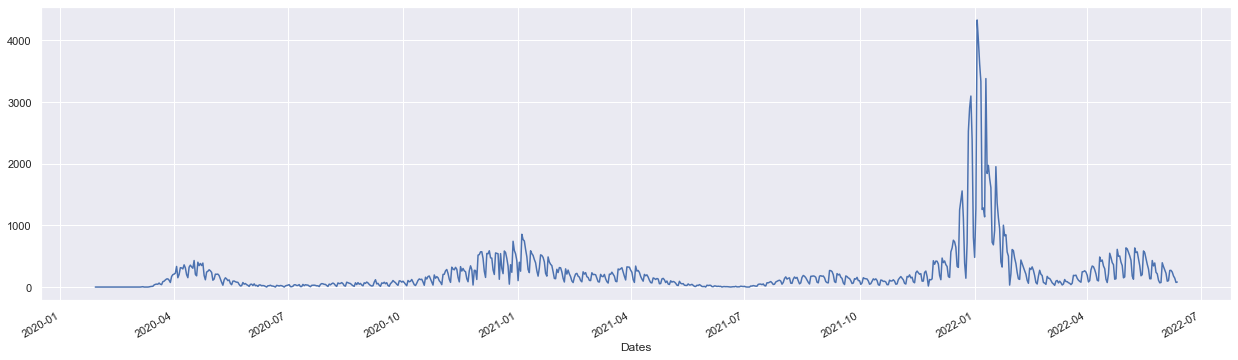

In [87]:
import seaborn as sns
sns.set_theme(style="darkgrid")
y.plot(figsize=(19, 6))
plt.show()

### Using the “sm.tsa.seasonal_decompose” command from the pylab library we can decompose the time-series into three distinct components: trend, seasonality, and noise.

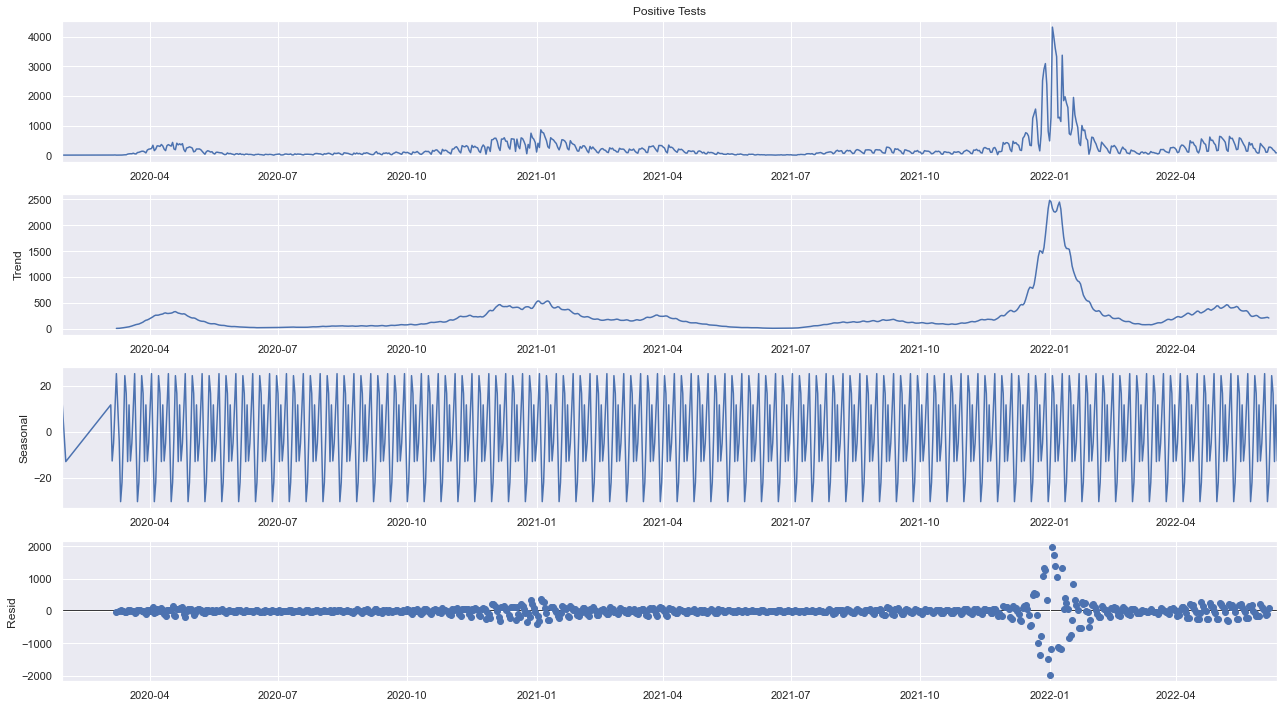

In [88]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive',period=12)
fig = decomposition.plot()
plt.show()

## Boson Covid-19 Positive Cases Time Series is Stacionary, also Does not Show a clear trend, Its values fluctuate around its mean()

# SARIMA to time series forecasting
Let’s use SARIMA. The models notation is SARIMA(p, d, q).(P,D,Q)m. These three parameters account for seasonality, trend, and noise in data

# (p,d,q) p = Seasonality, d = trend, and q = noise 

In [89]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)
for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[5], seasonal_pdq[5]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (1, 0, 1) x (1, 0, 1, 12)


### AIC estimates the quality of each model, relative to each of the other models. The low AIC value the better

In [90]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

# Since our time series does not show trend we will set the model order = (1,0,1)

In [91]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0,1,2),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4663      0.032     14.462      0.000       0.403       0.529
ma.L1          0.3152      0.033      9.611      0.000       0.251       0.379
ar.S.L2        0.9532      0.010     95.787      0.000       0.934       0.973
ma.S.L2       -0.7483      0.025    -29.450      0.000      -0.798      -0.698
sigma2      4.361e+04    403.638    108.045      0.000    4.28e+04    4.44e+04


### AR: Auto regressive model (can be a simple, multiple or non-linear regression)

### MA: Moving averages model. The moving average models can use weighting factors, where the observations are weighted by a trim factor (for the oldest data in the series) and with a higher weight for the most recent observations.

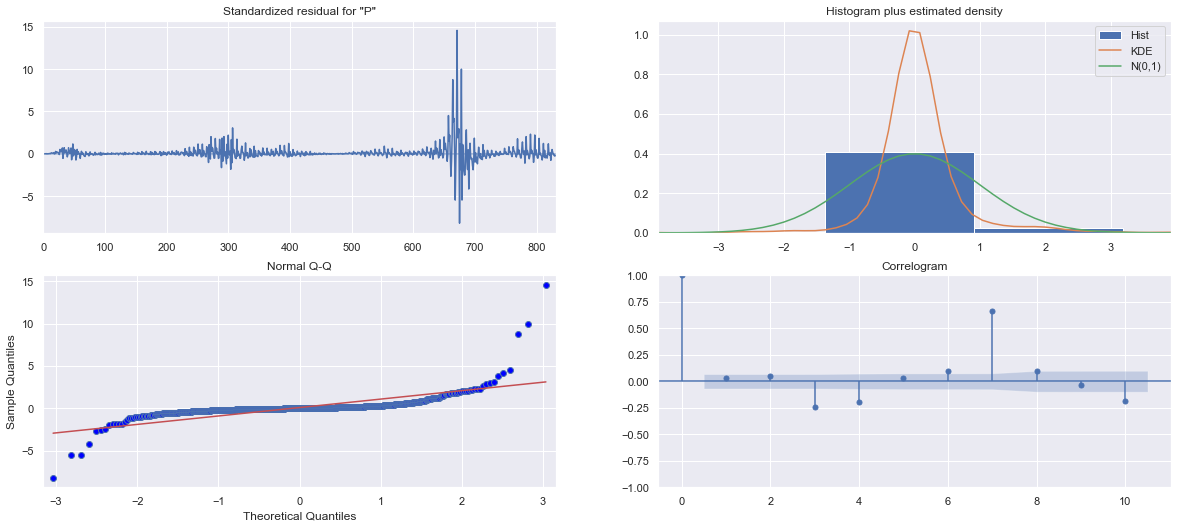

In [92]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

### With the diagnostic above we can visualize important information as the distribution and the Auto correlation function ACF (correlogram). Values upward the “0” has little correlation over the time series data. Values near to “1” demonstrates strongest correlation.

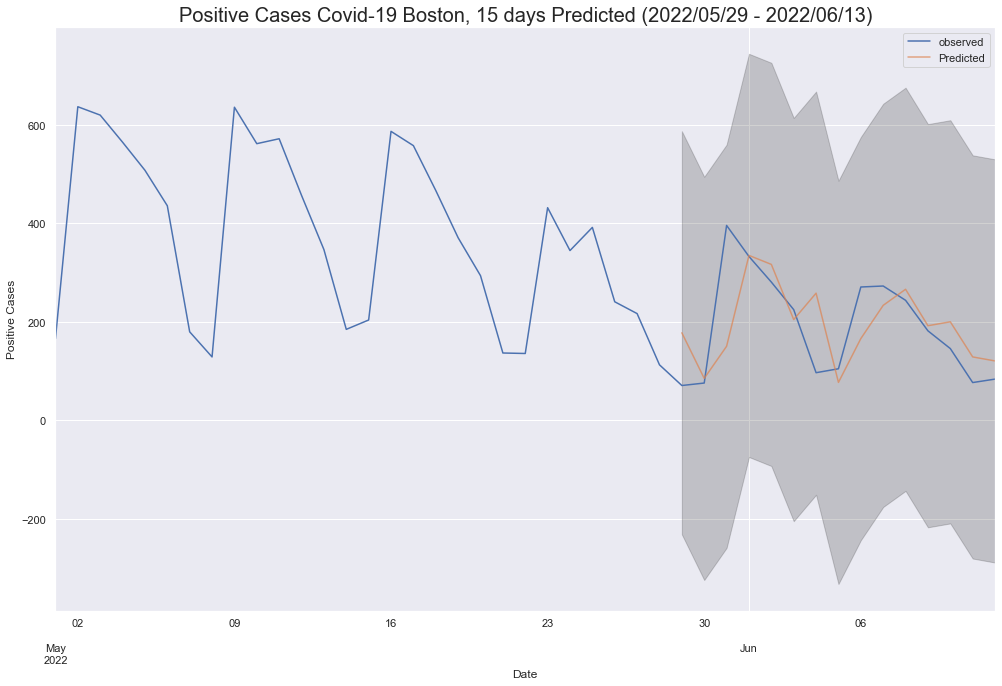

In [93]:
pred = results.get_prediction(start=pd.to_datetime('2022-05-29'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2022-5-1':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(15, 10))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Positive Cases')
plt.title('Positive Cases Covid-19 Boston, 15 days Predicted (2022/05/29 - 2022/06/13)', fontsize=20)
plt.legend()
plt.show("log")

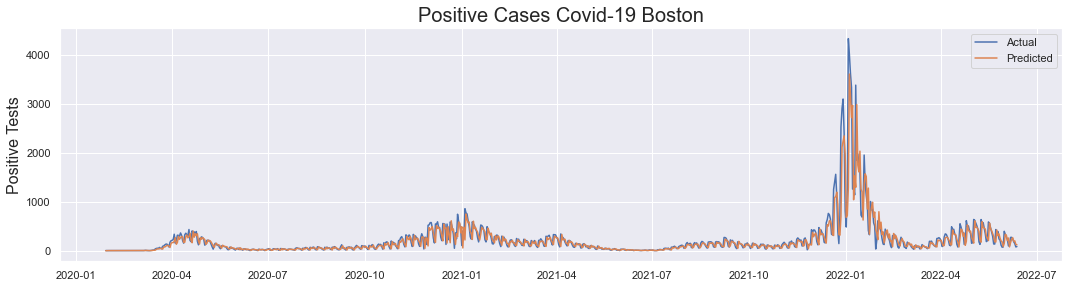

In [94]:
plt.figure(figsize=(16,4))
plt.plot(y, label="Actual")
plt.plot(results.predict(), label="Predicted")
plt.title('Positive Cases Covid-19 Boston', fontsize=20)
plt.ylabel('Positive Tests', fontsize=16)
plt.legend()

In [95]:
y_forecasted = pred.predicted_mean
y_truth = y['2022-05-29':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 8027.95
The Root Mean Squared Error is 89.6


Forecast Accuracy of: Positive Tests
mape : 1.4158
me : 161.638
mae : 171.3588
mpe : 1.3901
rmse : 197.4777
corr : 0.3345
minmax : 0.4748

In [96]:
y

Dates
2020-01-29      2.5
2020-02-01      2.5
2020-03-04      2.5
2020-03-05      2.5
2020-03-06      5.0
              ...  
2022-06-08    244.0
2022-06-09    182.0
2022-06-10    146.0
2022-06-11     77.0
2022-06-12     84.0
Name: Positive Tests, Length: 832, dtype: float64

In [97]:
pred_uc = results.get_forecast(steps=12)

<AxesSubplot:>

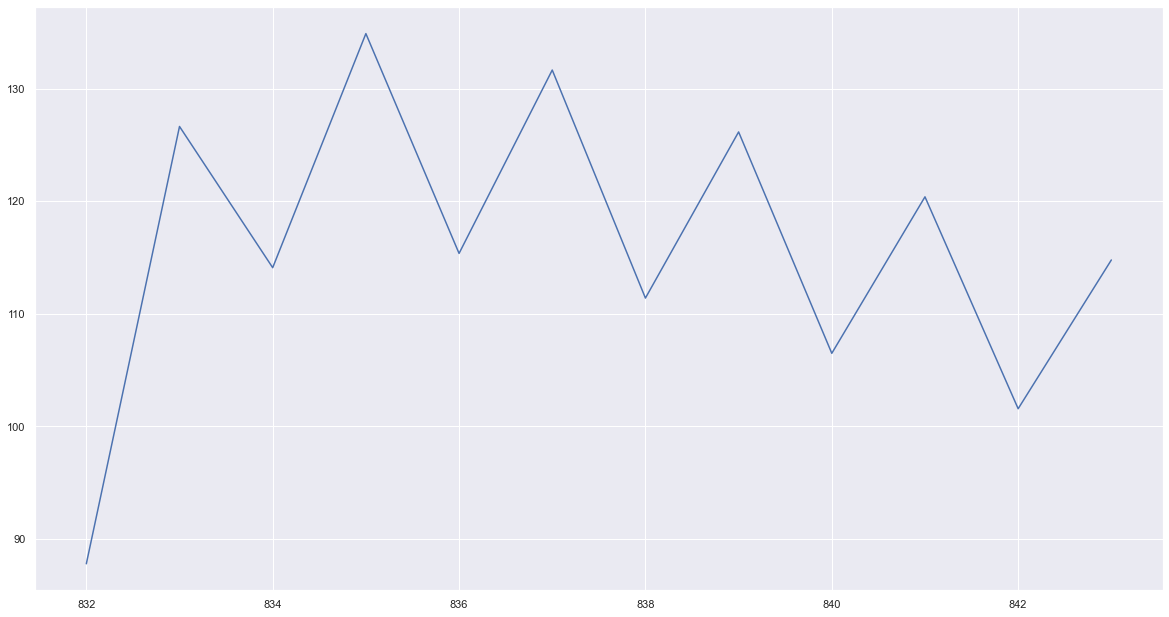

In [98]:
pred_uc.predicted_mean.plot(label='Forecast')

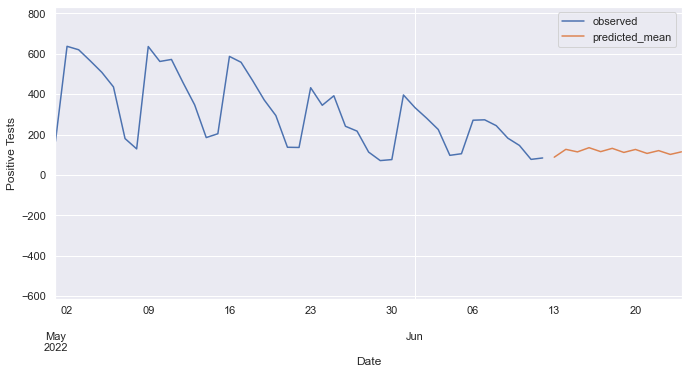

In [99]:
forcast = pred_uc.predicted_mean
forcast = forcast.to_frame().reset_index(drop=True)
import datetime

starting_time = datetime.datetime(2022,6,13)
td = 1  # timedelta
forcast['Dates'] = [starting_time + datetime.timedelta(days=i*td) for i in range(len(forcast))]

forcast = forcast.set_index('Dates',drop=True)

pred_ci = pred_uc.conf_int()

ax = y['2022-5-1':].plot(label='observed', figsize=(10, 5))
forcast.plot(ax=ax ,label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Positive Tests')
plt.legend()
plt.show()

In [100]:
y

Dates
2020-01-29      2.5
2020-02-01      2.5
2020-03-04      2.5
2020-03-05      2.5
2020-03-06      5.0
              ...  
2022-06-08    244.0
2022-06-09    182.0
2022-06-10    146.0
2022-06-11     77.0
2022-06-12     84.0
Name: Positive Tests, Length: 832, dtype: float64

In [101]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

Dates
2022-05-29    178.005692
2022-05-30     85.439738
2022-05-31    150.651333
2022-06-01    335.146681
2022-06-02    316.895004
2022-06-03    204.864218
2022-06-04    258.466212
2022-06-05     77.316539
2022-06-06    166.220037
2022-06-07    233.714042
2022-06-08    266.376758
2022-06-09    192.382022
Name: predicted_mean, dtype: float64

In [102]:
y_truth.head(12)

Dates
2022-05-29     71.0
2022-05-30     76.0
2022-05-31    396.0
2022-06-01    333.0
2022-06-02    281.0
2022-06-03    225.0
2022-06-04     97.0
2022-06-05    105.0
2022-06-06    271.0
2022-06-07    273.0
2022-06-08    244.0
2022-06-09    182.0
Name: Positive Tests, dtype: float64

In [103]:
pred_ci.head(15)

,lower Positive Tests,upper Positive Tests
832,-321.499365,497.107946
833,-392.801274,646.091033
834,-455.195804,683.403824
835,-450.206882,719.992527
836,-486.924478,717.666162
837,-477.596021,740.909860
838,-509.359133,732.167105
839,-499.671388,751.991367
840,-528.870015,741.866094
841,-519.268912,760.061006


In [104]:
forecast = pred_uc.predicted_mean

forecast2 = forecast.to_frame().reset_index(drop=True)
import datetime

starting_time = datetime.datetime(2022,6,12)
td = 1  # timedelta
forecast2['Dates'] = [starting_time + datetime.timedelta(days=i*td) for i in range(len(forecast2))]

forecast2 = forecast2.set_index('Dates',drop=True)
forecast2.head(15)

,predicted_mean
Dates,
2022-06-12,87.804290
2022-06-13,126.644879
2022-06-14,114.104010
2022-06-15,134.892823
2022-06-16,115.370842
2022-06-17,131.656920
2022-06-18,111.403986
2022-06-19,126.159990
2022-06-20,106.498040


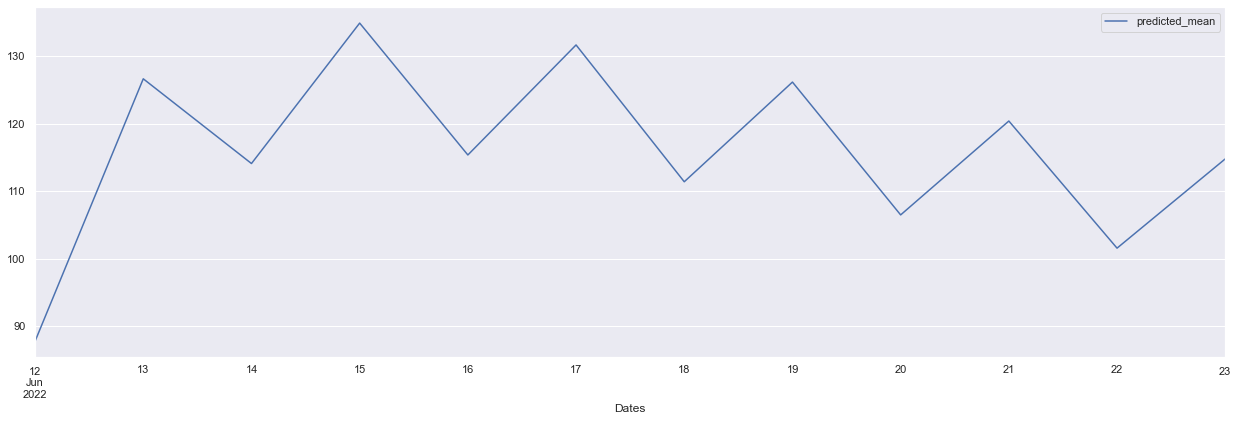

In [105]:
forecast2.plot(figsize=(19, 6))
plt.show()

In [106]:
#y = y.to_frame()
f = [y,forecast2]
f2 = pd.concat(f)

In [107]:
f2

,0,predicted_mean
Dates,,
2020-01-29,2.5,NaN
2020-02-01,2.5,NaN
2020-03-04,2.5,NaN
2020-03-05,2.5,NaN
2020-03-06,5.0,NaN
...,...,...
2022-06-19,NaN,126.159990
2022-06-20,NaN,106.498040
2022-06-21,NaN,120.396047


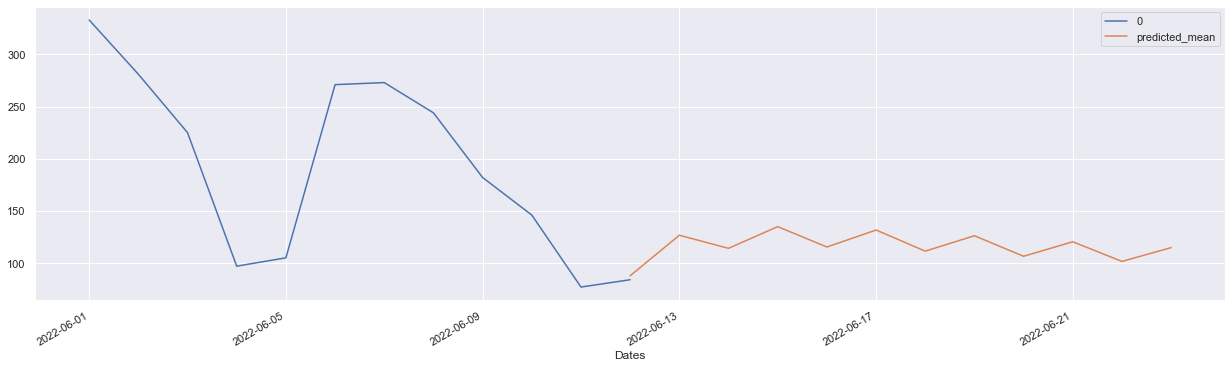

In [108]:
f2['2022-06-01':].plot(figsize=(19, 6))
plt.show()

# ARIMA MODEL

In [109]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

pdq 

In [110]:
arima = sm.tsa.arima.ARIMA(y, order=(6,0,1))
predictions = arima.fit().predict()

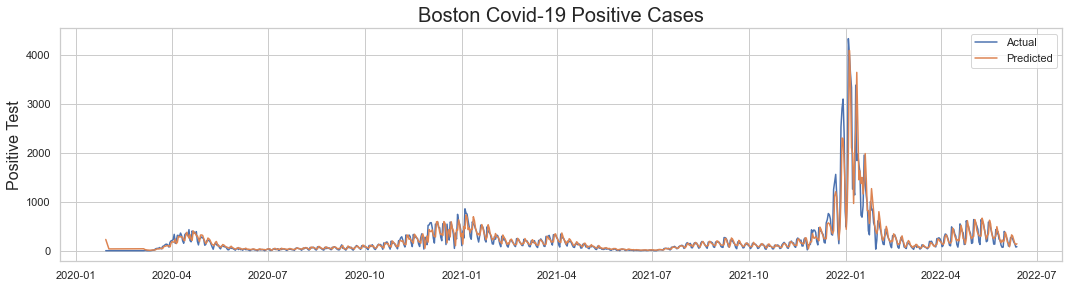

In [111]:
plt.figure(figsize=(16,4))
plt.plot(y, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Boston Covid-19 Positive Cases', fontsize=20)
plt.ylabel('Positive Test', fontsize=16)
plt.legend()

In [112]:
print(arima.fit().summary())

                               SARIMAX Results                                
Dep. Variable:         Positive Tests   No. Observations:                  832
Model:                 ARIMA(6, 0, 1)   Log Likelihood               -5469.436
Date:                Tue, 28 Jun 2022   AIC                          10956.872
Time:                        17:06:48   BIC                          10999.387
Sample:                             0   HQIC                         10973.174
                                - 832                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        231.8664    272.908      0.850      0.396    -303.024     766.756
ar.L1          0.8834      0.027     32.383      0.000       0.830       0.937
ar.L2         -0.1452      0.029     -4.976      0.0

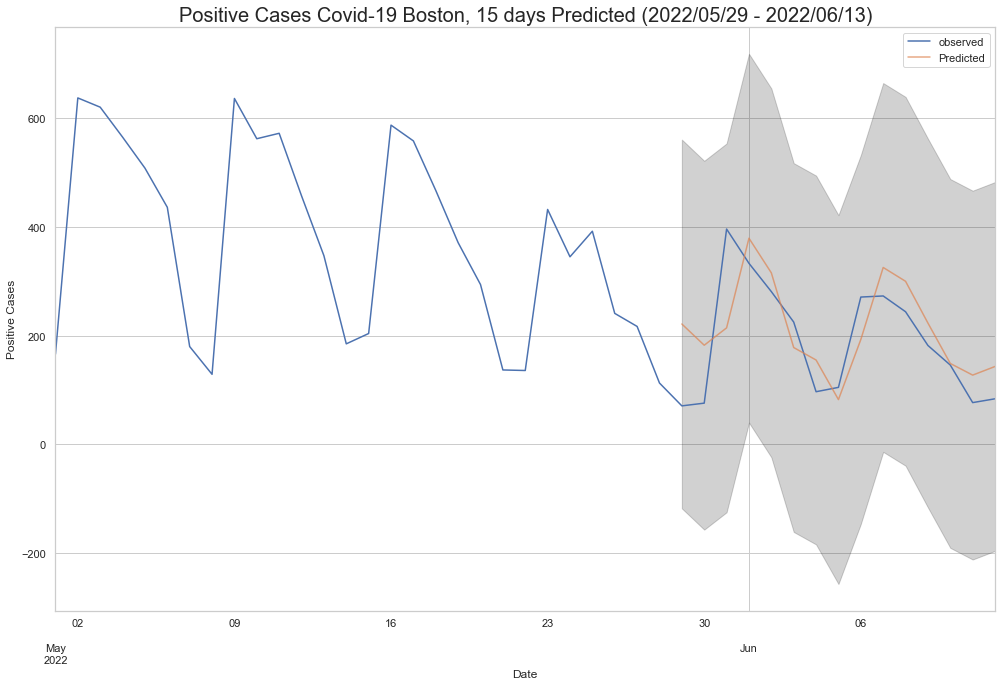

In [113]:
pred = arima.fit().get_prediction(start=pd.to_datetime('2022-05-29'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2022-5-1':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(15, 10))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Positive Cases')
plt.title('Positive Cases Covid-19 Boston, 15 days Predicted (2022/05/29 - 2022/06/13)', fontsize=20)
plt.legend()
plt.show("log")

In [114]:
y_forecasted = pred.predicted_mean
y_truth = y['2022-05-29':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 6407.33
The Root Mean Squared Error is 80.05


In [115]:
forcast = arima.fit().forecast(steps=15, exog=None, alpha=0.05)

In [116]:
forcast

832    162.079065
833    216.686498
834    224.539410
835    196.545557
836    147.436920
837    115.851063
838    126.369806
839    163.968258
840    198.514737
841    208.578993
842    190.509673
843    160.772017
844    142.734389
845    147.950261
846    169.915522
Name: predicted_mean, dtype: float64

In [117]:
forcast = arima.fit().get_forecast(steps=15)

In [118]:
forcast

In [119]:
print(forcast.summary_frame())

Positive Tests        mean     mean_se  mean_ci_lower  mean_ci_upper
832             162.079065  172.929430    -176.856389     501.014519
833             216.686498  206.404022    -187.857951     621.230947
834             224.539410  219.417256    -205.510510     654.589331
835             196.545557  219.851644    -234.355748     627.446862
836             147.436920  219.855998    -283.472919     578.346758
837             115.851063  219.885458    -315.116516     546.818642
838             126.369806  227.248764    -319.029588     571.769199
839             163.968258  243.907416    -314.081493     642.018010
840             198.514737  261.251483    -313.528760     710.558233
841             208.578993  268.470942    -317.614384     734.772371
842             190.509673  270.045627    -338.770030     719.789376
843             160.772017  270.146372    -368.705142     690.249176
844             142.734389  270.824532    -388.071939     673.540717
845             147.950261  274.59

In [120]:
forcast = arima.fit().forecast(steps=15, exog=None, alpha=0.05)
forcast = forcast.to_frame().reset_index(drop=True)
import datetime

starting_time = datetime.datetime(2022,6,13)
td = 1  # timedelta
forcast['Dates'] = [starting_time + datetime.timedelta(days=i*td) for i in range(len(forcast))]

forcast = forcast.set_index('Dates',drop=True)


<AxesSubplot:xlabel='Dates'>

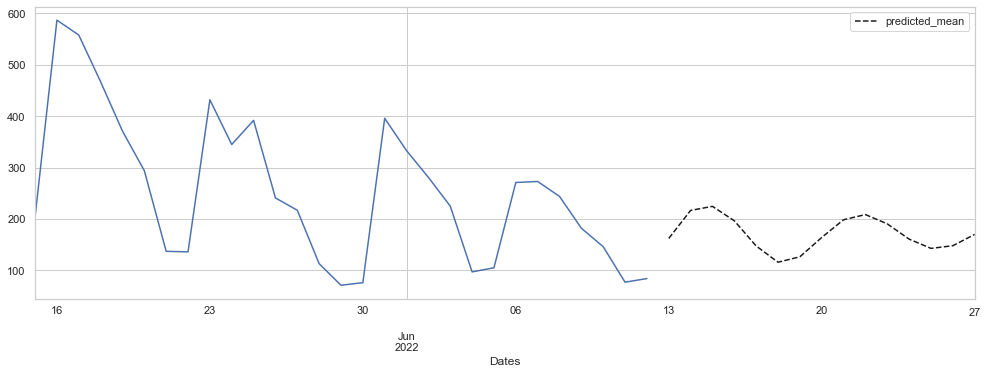

In [121]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
y.loc['2022-05-15':].plot(ax=ax)

# Construct the forecasts
#fcast = forcast.summary_frame()
forcast.plot(ax=ax, style='k--')
# ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);


In [122]:
# arima = ARIMA(y, order=(12,1,1))
# predictions = arima.fit().predict()

#### Correlation Matrix

In [123]:
corr = my_df.corr()

In [124]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Positive Tests,Emergency Department Visits,Number of Adult Hospitalizations due to COVID-19,Number of Adult Non-Surge ICU Beds,% CLI (All Visits),DOMESTIC,INTERNATIONAL,Boston-Tests,Community-Tests,College-Tests,Mask_Mask Mandated,Mask_No mask,Mask_Optional,Year_2020,Year_2021,Year_2022
Positive Tests,1.00,0.63,0.58,0.06,0.63,0.06,0.14,0.34,0.60,0.15,0.01,-0.04,0.02,-0.18,-0.06,0.29
Emergency Department Visits,0.63,1.00,0.61,0.40,0.38,0.49,0.44,0.50,0.57,0.39,0.16,-0.47,0.18,-0.59,0.27,0.38
Number of Adult Hospitalizations due to COVID-19,0.58,0.61,1.00,0.13,0.28,0.36,0.35,0.24,0.19,0.23,0.00,-0.15,0.12,-0.40,-0.10,0.60
Number of Adult Non-Surge ICU Beds,0.06,0.40,0.13,1.00,-0.23,0.16,-0.05,0.30,0.31,0.25,0.49,-0.86,0.09,-0.33,0.22,0.12
% CLI (All Visits),0.63,0.38,0.28,-0.23,1.00,-0.21,-0.00,0.06,0.34,-0.10,-0.08,0.28,-0.13,0.10,-0.07,-0.03
DOMESTIC,0.06,0.49,0.36,0.16,-0.21,1.00,0.85,0.18,0.03,0.24,-0.23,-0.26,0.49,-0.75,0.36,0.45
INTERNATIONAL,0.14,0.44,0.35,-0.05,-0.00,0.85,1.00,0.19,0.10,0.20,-0.04,-0.06,0.10,-0.59,0.46,0.13
Boston-Tests,0.34,0.50,0.24,0.30,0.06,0.18,0.19,1.00,0.81,0.95,0.32,-0.34,-0.12,-0.33,0.33,-0.01
Community-Tests,0.60,0.57,0.19,0.31,0.34,0.03,0.10,0.81,1.00,0.59,0.32,-0.33,-0.12,-0.22,0.25,-0.05
College-Tests,0.15,0.39,0.23,0.25,-0.10,0.24,0.20,0.95,0.59,1.00,0.28,-0.30,-0.10,-0.35,0.32,0.02


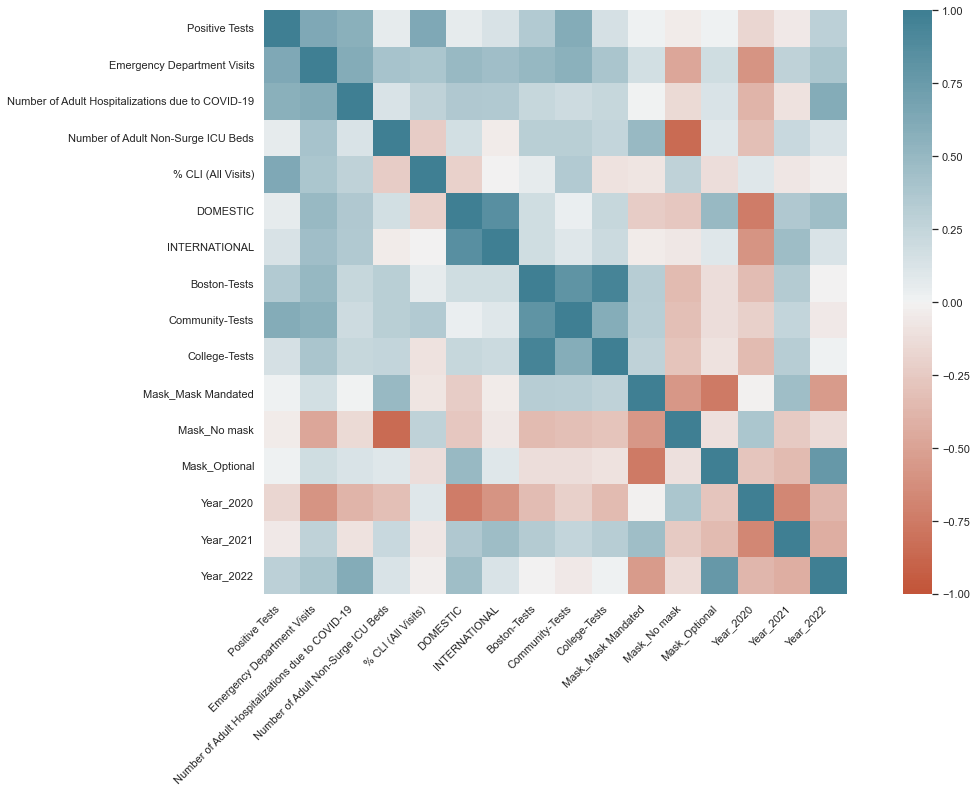

In [125]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [126]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 3 to 847
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Dates                                             832 non-null    datetime64[ns]
 1   Positive Tests                                    832 non-null    float64       
 2   Emergency Department Visits                       832 non-null    float64       
 3   Number of Adult Hospitalizations due to COVID-19  832 non-null    float64       
 4   Number of Adult Non-Surge ICU Beds                832 non-null    float64       
 5   % CLI (All Visits)                                832 non-null    float64       
 6   DOMESTIC                                          832 non-null    float64       
 7   INTERNATIONAL                                     832 non-null    float64       
 8   Boston-Tests                  

In [127]:
my_df = my_df.drop("Dates",axis=1)

## Model Building

In [130]:
X = my_df.drop(["Positive Tests"], axis = 1)

y = my_df["Positive Tests"]

feature_names = X.columns

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.2)

In [132]:
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [133]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(665, 15)

(665,)

(167, 15)

(167,)

In [134]:
# rc = RobustScaler()
# X_train = rc.fit_transform(X_train)
# X_test  = rc.transform(X_test)

In [135]:
#!pip install xgboost

In [136]:
from xgboost import XGBRegressor

In [137]:
#train XGBoost model
XGB_model = XGBRegressor(n_estimators = 100, learning_rate = 0.08, gamma = 0, subsample = 0.75, colsample_bytree = 1, max_depth = 10)

XGB_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
y_train_predict = XGB_model.predict(X_train)

In [139]:
print(f'MAE: {mean_absolute_error(y_train, y_train_predict)}')
print(f'MSE: {mean_squared_error(y_train, y_train_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, y_train_predict))}')
print(f'R^2: {r2_score(y_train, y_train_predict)}')

MAE: 4.898486551844088
MSE: 65.62050966228976
RMSE: 8.100648718608268
R^2: 0.9996267481453428


In [140]:
y_test_predict = XGB_model.predict(X_test)

In [141]:
print(f'MAE: {mean_absolute_error(y_test, y_test_predict)}')
print(f'MSE: {mean_squared_error(y_test, y_test_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_test_predict))}')
print(f'R^2: {r2_score(y_test, y_test_predict)}')

MAE: 49.03320770206566
MSE: 9704.668942140097
RMSE: 98.51227812887132
R^2: 0.9210080002048012


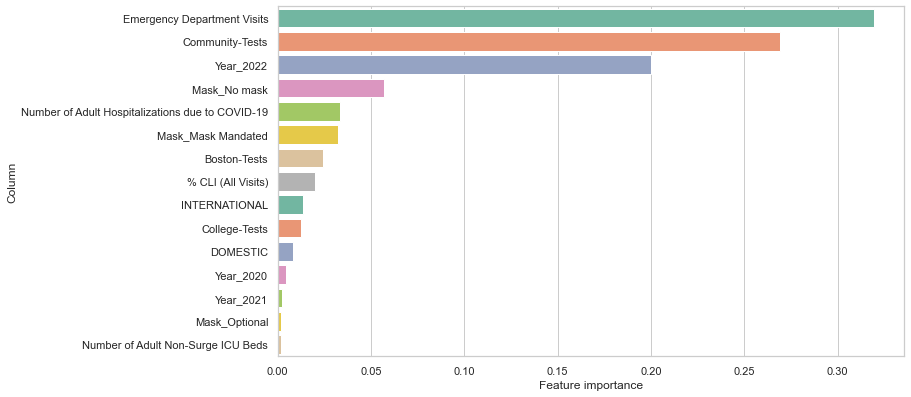

In [142]:
features_importance = pd.DataFrame(
    {
        'Column': feature_names,
        'Feature importance': XGB_model.feature_importances_
    }
).sort_values('Feature importance', ascending = False)

fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.barplot(x = "Feature importance", y = "Column", data = features_importance, palette = "Set2", orient = 'h');